In [34]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import re
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import math
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn import metrics
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from joblib import dump
import os


In [35]:
import pandas as pd
file_path = '/home/roy/Documents/daTa.csv'
df = pd.read_csv(file_path)


In [36]:
#determine whether a CUDA-enabled GPU is available and set the device accordingly.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [37]:
df

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,450174,http://atualizapj.com/,malicious,1


In [38]:

df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [39]:

df0 = df[df['result'] == 0].copy()
df1 = df[df['result'] == 1].copy()
df0= df0[:90000]
df1= df1[:90000]
df = pd.concat([df0,df1], ignore_index=True)
df


,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
...,...,...,...,...
179995,435733,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1
179996,435734,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1
179997,435735,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1
179998,435736,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1


In [40]:

# Function to check if a URL uses an IP address
def uses_ip_address(url):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(url))
    
def lengthurl(url):
    return len(url)

def countletters(url):
    count = 0
    for char in url:
        if char.isalpha():
            count += 1
    return count
    
def count_digits(url):
    count = 0
    for char in url:
        if char.isdigit():
            count += 1
    return count

def numberDots(url):
    count =0
    for char in url:
        if char=='.':
            count+=1

    return count

def numberHyphen(url):
    count =0
    for char in url:
        if char=='-':
            count+=1

    return count

def numberBackSlash(url):
    count =0
    for char in url:
        if char=='/':
            count+=1

    return count

def count_letter_digit_letter(url):
    pattern = re.compile(r'[a-zA-Z]\d+[a-zA-Z]')
    occurrences = len(re.findall(pattern, url))
    return occurrences


def count_digit_letter_digit(url):
    pattern = re.compile(r'\d+[a-zA-Z]\d+')
    occurrences = len(re.findall(pattern, url))
    return occurrences

# Function to count delimiters and find the longest word length
def analyze_delimiters_and_longest_word(url):
    delimiters_count = {}
    longest_word_length = 0
    
    # Define delimiters as any non-alphanumeric characters
    delimiters = re.compile(r'[^a-zA-Z0-9]+')
    components = re.split(delimiters, url)
    
    # Iterate over the components
    for component in components:
        # Count delimiters in each component
        delimiters_count[component] = len(re.findall(delimiters, component))
        
        # Find the longest word length
        if len(component) > longest_word_length:
            longest_word_length = len(component)
    
    return delimiters_count, longest_word_length

def check_domain_reputation(domain):
    known_malicious_domains = ['maliciousdomain1.com', 'maliciousdomain2.net']  # need to add more
    if domain in known_malicious_domains:
        return True
    else:
        return False
        

def has_suspicious_keywords(url):
    suspicious_keywords = ['phishing', 'malware', 'scam','faboleena','g0ogle']  # Add more 
    for keyword in suspicious_keywords:
        if keyword in url:
            return True
    return False
    
def has_subdomains(url):
    if len(url.split('.')) > 2:
        return 1
    else:
        return 0
    

def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

def number_rate(url):
    # Count occurrences of digits
    digit_count = sum(1 for char in url if char.isdigit())
    
    # Compute number rate
    rate = digit_count / len(url) if len(url) > 0 else 0
    
    return rate

def alphabet_entropy(url):
    # Count occurrences of each letter
    letter_counts = {chr(i): 0 for i in range(ord('a'), ord('z') + 1)}
    total_letters = 0
    
    for char in url.lower():
        if 'a' <= char <= 'z':  # Check if char is a lowercase English letter
            letter_counts[char] += 1
            total_letters += 1
    
    # Compute probabilities and entropy
    entropy = 0
    for count in letter_counts.values():
        if count > 0:
            probability = count / total_letters
            entropy -= probability * math.log2(probability)
    
    return entropy
def starts_with_https(url):
    return url.startswith("https://")

In [41]:

def get_accuracy(name, trained_model, x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :", metrics.accuracy_score(y_test, tree_predict) * 100, "%")
    print("MSE [TEST]          :", mean_squared_error(y_test, tree_predict))
    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :", metrics.accuracy_score(y_train, tree_predict1) * 100, "%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))
    cf1 = confusion_matrix(y_test,tree_predict)
    sb.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()
    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))



In [42]:
df['uses_ip'] = df['url'].apply(uses_ip_address)
df['count_digits'] = df['url'].apply(count_digits)
df['count_letters'] = df['url'].apply(countletters)
df['length'] = df['url'].apply(lengthurl)
df['letter_digit_letter_count'] = df['url'].apply(count_letter_digit_letter)
df['digit_letter_digit_count'] = df['url'].apply(count_digit_letter_digit)
df['has_suspicious_keywords'] = df['url'].apply(has_suspicious_keywords)
df['has_subdomains'] = df['url'].apply(has_subdomains)
df['numberDots'] = df['url'].apply(numberDots) 
df['numberHyphen'] = df['url'].apply(numberHyphen) 
df['numberBackSlash'] = df['url'].apply(numberBackSlash) 
df['number_rate'] = df['url'].apply(number_rate)
df['alphabet_entropy'] = df['url'].apply(alphabet_entropy)
df['starts_with_https'] = df['url'].apply(starts_with_https)




In [43]:
df

,Unnamed: 0,url,label,result,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,has_suspicious_keywords,has_subdomains,numberDots,numberHyphen,numberBackSlash,number_rate,alphabet_entropy,starts_with_https
0,0,https://www.google.com,benign,0,False,0,17,22,0,0,False,1,2,0,2,0.000000,3.292770,True
1,1,https://www.youtube.com,benign,0,False,0,18,23,0,0,False,1,2,0,2,0.000000,3.419382,True
2,2,https://www.facebook.com,benign,0,False,0,19,24,0,0,False,1,2,0,2,0.000000,3.536887,True
3,3,https://www.baidu.com,benign,0,False,0,16,21,0,0,False,1,2,0,2,0.000000,3.577820,True
4,4,https://www.wikipedia.org,benign,0,False,0,20,25,0,0,False,1,2,0,2,0.000000,3.484184,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,435733,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1,False,22,115,152,9,3,False,0,1,0,11,0.144737,4.307939,False
179996,435734,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1,False,22,115,152,9,4,False,0,1,0,11,0.144737,4.414012,False
179997,435735,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1,False,24,121,163,7,1,False,1,2,0,11,0.147239,4.473904,False
179998,435736,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1,False,26,111,152,10,3,False,0,1,0,11,0.171053,4.340286,False


In [52]:


#sw=list(set(stopwords.words("english")))
df['clean_url']=df.url.astype(str)
#df['clean_url']=df['clean_url'].apply(lambda x:" ".join([word for word in x.split() if word not in sw]))
tok= RegexpTokenizer(r'[A-Za-z0-9]+')
tok.tokenize(df.url[1])
df.clean_url=df.clean_url.map(lambda x: tok.tokenize(x))
#nltk.download('omw-1.4')
wnl = WordNetLemmatizer()
df['lem_url'] = df['clean_url'].map(lambda x: [wnl.lemmatize(word) for word in x])
word_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500)
tfidf_features = word_vectorizer.fit_transform(df['lem_url'].astype(str))


# Initialize CountVectorizer
cv = CountVectorizer()
count_features = cv.fit_transform(df['lem_url'].astype(str))


In [45]:
df

,Unnamed: 0,url,label,result,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,has_suspicious_keywords,has_subdomains,numberDots,numberHyphen,numberBackSlash,number_rate,alphabet_entropy,starts_with_https,clean_url,lem_url
0,0,https://www.google.com,benign,0,False,0,17,22,0,0,False,1,2,0,2,0.000000,3.292770,True,"[https, www, google, com]","[http, www, google, com]"
1,1,https://www.youtube.com,benign,0,False,0,18,23,0,0,False,1,2,0,2,0.000000,3.419382,True,"[https, www, youtube, com]","[http, www, youtube, com]"
2,2,https://www.facebook.com,benign,0,False,0,19,24,0,0,False,1,2,0,2,0.000000,3.536887,True,"[https, www, facebook, com]","[http, www, facebook, com]"
3,3,https://www.baidu.com,benign,0,False,0,16,21,0,0,False,1,2,0,2,0.000000,3.577820,True,"[https, www, baidu, com]","[http, www, baidu, com]"
4,4,https://www.wikipedia.org,benign,0,False,0,20,25,0,0,False,1,2,0,2,0.000000,3.484184,True,"[https, www, wikipedia, org]","[http, www, wikipedia, org]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,435733,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1,False,22,115,152,9,3,False,0,1,0,11,0.144737,4.307939,False,"[http, stcroixlofts, com, inc, manager, config...","[http, stcroixlofts, com, inc, manager, config..."
179996,435734,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1,False,22,115,152,9,4,False,0,1,0,11,0.144737,4.414012,False,"[http, stcroixlofts, com, inc, manager, config...","[http, stcroixlofts, com, inc, manager, config..."
179997,435735,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1,False,24,121,163,7,1,False,1,2,0,11,0.147239,4.473904,False,"[http, stcroixlofts, com, inc, manager, config...","[http, stcroixlofts, com, inc, manager, config..."
179998,435736,http://stcroixlofts.com/inc/manager/config/aut...,malicious,1,False,26,111,152,10,3,False,0,1,0,11,0.171053,4.340286,False,"[http, stcroixlofts, com, inc, manager, config...","[http, stcroixlofts, com, inc, manager, config..."


Random Forest Classifier Metrics:
Training accuracy: 100.00%
Testing accuracy: 99.86%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


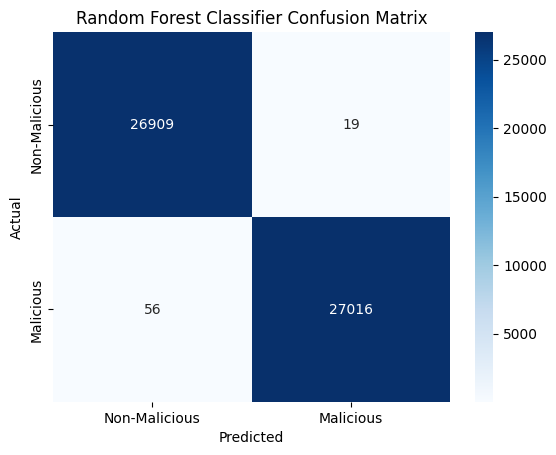

its over


SyntaxError: 'return' outside function (3893188549.py, line 32)

In [46]:
# Split features and target variable
y = df['label']
X = df.drop(columns=['url', 'label']) #move result
numerical_features = df[['uses_ip', 'count_digits', 'count_letters', 'length', 'letter_digit_letter_count', 
                         'digit_letter_digit_count', 'has_suspicious_keywords', 'has_subdomains', 'numberDots', 
                         'numberHyphen', 'numberBackSlash', 'number_rate', 'alphabet_entropy','starts_with_https']]

# Concatenate features
X = hstack([numerical_features.astype(float), tfidf_features, count_features])
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True)

# Train Logistic Regression model
trained_clf_RandomForest = RandomForestClassifier().fit(x_train, y_train)


print("Random Forest Classifier Metrics:")
print("Training accuracy: {:.2f}%".format(accuracy_score(y_train, trained_clf_RandomForest.predict(x_train)) * 100))
print("Testing accuracy: {:.2f}%".format(accuracy_score(y_test, trained_clf_RandomForest.predict(x_test)) * 100))
print("Precision: {:.2f}".format(precision_score(y_test, trained_clf_RandomForest.predict(x_test), average='weighted')))
print("Recall: {:.2f}".format(recall_score(y_test, trained_clf_RandomForest.predict(x_test), average='weighted')))
print("F1 Score: {:.2f}".format(f1_score(y_test, trained_clf_RandomForest.predict(x_test), average='weighted')))

# Confusion matrix visualization
cf_matrix = confusion_matrix(y_test, trained_clf_RandomForest.predict(x_test))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Malicious', 'Malicious'], yticklabels=['Non-Malicious', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

print("its over")


/home/roy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Training accuracy: 99.81%
Testing accuracy: 99.79%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


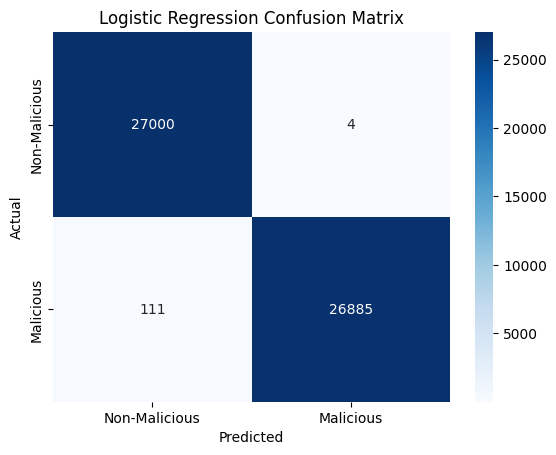

Model training and evaluation complete


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt

# Split features and target variable
y = df['label']
X = df.drop(columns=['url', 'label'])  # drop non-numeric and target columns to isolate features

# Define numerical features
numerical_features = df[['uses_ip', 'count_digits', 'count_letters', 'length', 
                         'letter_digit_letter_count', 'digit_letter_digit_count', 
                         'has_suspicious_keywords', 'has_subdomains', 'numberDots', 
                         'numberHyphen', 'numberBackSlash', 'number_rate', 
                         'alphabet_entropy', 'starts_with_https']]

# Concatenate features into a single feature matrix
X = hstack([numerical_features.astype(float), tfidf_features, count_features])
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=25, test_size=0.3, shuffle=True)

# Train Logistic Regression model
trained_clf_LogisticRegression = LogisticRegression().fit(x_train, y_train)

# Output metrics
print("Logistic Regression Metrics:")
print("Training accuracy: {:.2f}%".format(accuracy_score(y_train, trained_clf_LogisticRegression.predict(x_train)) * 100))
print("Testing accuracy: {:.2f}%".format(accuracy_score(y_test, trained_clf_LogisticRegression.predict(x_test)) * 100))
print("Precision: {:.2f}".format(precision_score(y_test, trained_clf_LogisticRegression.predict(x_test), average='weighted')))
print("Recall: {:.2f}".format(recall_score(y_test, trained_clf_LogisticRegression.predict(x_test), average='weighted')))
print("F1 Score: {:.2f}".format(f1_score(y_test, trained_clf_LogisticRegression.predict(x_test), average='weighted')))

# Confusion matrix visualization
cf_matrix = confusion_matrix(y_test, trained_clf_LogisticRegression.predict(x_test))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Malicious', 'Malicious'], yticklabels=['Non-Malicious', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


print("Model training and evaluation complete")


Naive Bayes Classifier Metrics:
Training accuracy: 98.36%
Testing accuracy: 97.72%
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


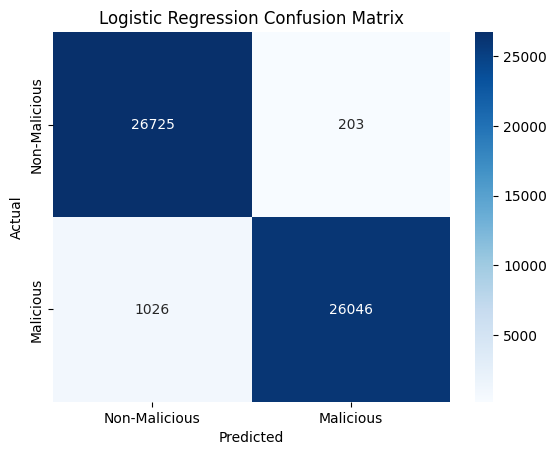

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df', 'tfidf_features', and 'count_features' are pre-loaded
y = df['label']
X = df.drop(columns=['url', 'label'])  # Isolating features

# Defining numerical features
numerical_features = df[['uses_ip', 'count_digits', 'count_letters', 'length', 
                         'letter_digit_letter_count', 'digit_letter_digit_count', 
                         'has_suspicious_keywords', 'has_subdomains', 'numberDots', 
                         'numberHyphen', 'numberBackSlash', 'number_rate', 
                         'alphabet_entropy', 'starts_with_https']].astype(float)

# Scale numerical features to be between 0 and 1
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(numerical_features)

# Combine scaled numerical features with tfidf and count features
X_combined = hstack([scaled_numerical, tfidf_features, count_features]).tocsr()

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42, shuffle=True)

# Initialize and train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(x_train, y_train)

# Model Evaluation
print("Naive Bayes Classifier Metrics:")
training_accuracy = accuracy_score(y_train, clf.predict(x_train))
testing_accuracy = accuracy_score(y_test, clf.predict(x_test))
print("Training accuracy: {:.2f}%".format(training_accuracy * 100))
print("Testing accuracy: {:.2f}%".format(testing_accuracy * 100))
print("Precision: {:.2f}".format(precision_score(y_test, clf.predict(x_test), average='weighted')))
print("Recall: {:.2f}".format(recall_score(y_test, clf.predict(x_test), average='weighted')))
print("F1 Score: {:.2f}".format(f1_score(y_test, clf.predict(x_test), average='weighted')))

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, clf.predict(x_test))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Malicious', 'Malicious'], yticklabels=['Non-Malicious', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

